In [1]:
from config import Config

config = Config()
config.load_dependencies()

Loaded setup.cfg
Dependency -> tf_slim_models added from -> /home/rodsnjr/Git/models/slim/


In [2]:
# Used libraries import
%matplotlib inline

from matplotlib import pyplot as plt

import numpy as np
import os
import tensorflow as tf
from datasets import dataset_utils

In [3]:
# Download the model
url = config.model_url('vgg')
# Specify where you want to download the model to
checkpoints_dir = config.checkpoint_dir('vgg')

if not tf.gfile.Exists(checkpoints_dir):
    tf.gfile.MakeDirs(checkpoints_dir)

dataset_utils.download_and_uncompress_tarball(url, checkpoints_dir)

>> Downloading vgg_16_2016_08_28.tar.gz 3.5%

KeyboardInterrupt: 

In [3]:
from indoor_recognition.datasets import gvc_indoor as gvc

gvc_dataset = gvc.GVC_Dataset(config.dataset_dir('gvc'))
# Check if the dataset is in directory, download, and extract if not
gvc_dataset.check_available()

File already exists


In [5]:
from indoor_recognition.datasets import gvc_indoor as gvc
#gvc_datasetn after the download is complete
gvc_dataset.extract()

162.618075732601it [00:00, 1620.48it/s]

Extracting  /home/rodsnjr/Git/indoor_recognition/datasets/gvc_dataset/gvc_dataset.zip


287593.29477018694it [00:05, 52804.83it/s] 


In [4]:
# And proccess the dataset with the correct function, generating the TF Record Files
from nets import vgg
from preprocessing import vgg_preprocessing

# Default pre processors
image_size = vgg.vgg_16.default_image_size

gvc_dataset.load_images()
gvc_dataset.convert_to_np(save_dir="/media/rodsnjr/My Files/gvc_dataset")

Loading Door Images
Loading Indoor Images


# Checkpoint

Loaded setup.cfg
Dependency -> tf_slim_models added from -> /home/rodsnjr/Git/models/slim/
[0]


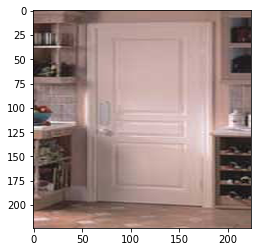

In [1]:
from indoor_recognition.datasets import gvc_indoor as gvc
# Used libraries import
%matplotlib inline
from config import Config

from matplotlib import pyplot as plt

config = Config()
config.load_dependencies()

gvc_dataset = gvc.GVC_Dataset(config.dataset_dir('gvc'))

# Show a image for testing
images, labels = gvc_dataset.load_np_batch(load_dir="/media/rodsnjr/My Files/gvc_dataset", batch_num=1)
print(labels[0])
plt.imshow(images[0])